## <font color='blue'>**Introduction to Scikit-learn and K-Nearest Neighbors**</font>

KNN operates on the principle of similarity. It assumes that similar things exist in close proximity.

### <font color='black'>**Learning Objectives**</font>
1. Loading and preprocessing dataset with Scikit-learn.
2. Splitting the data into training, validation and test sets
3. Computing measures of distance in feature space
4. Implementing KNN algorithm from scratch (with fixed value of K)
5. Evaluating classification metrics on the test set.
6. Verifying results with Scikit-learn
7. Visualizing K-NN decision boundaries with Scikit-learn


In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# loading a dataset from sklearn.datasets
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# getting keys of dataset stored as bunch type
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# getting description of loaded dataset
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
# getting feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# getting names of labels of target variable
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# storing features into X
X = iris.data
# storing target into Y
Y = iris.target

In [8]:
# getting shape of feature set
X.shape

(150, 4)

In [9]:
# converting into pandas dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = Y

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


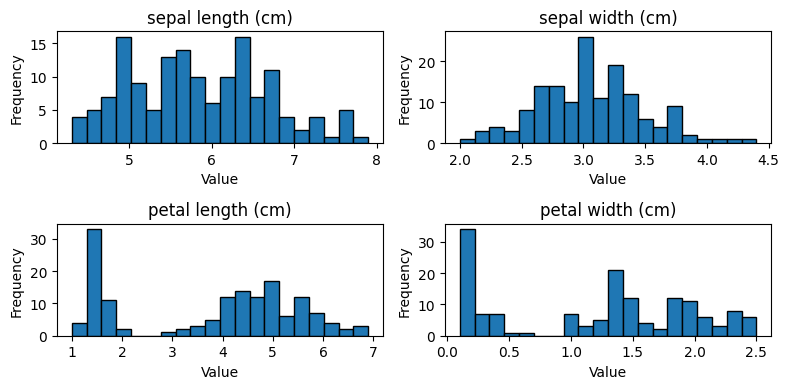

In [11]:
# Define the number of features
num_features = len(df.columns)
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4))
axes = axes.flatten()  # Flatten the array for easy iteration

# Plot each feature
for i, feature in enumerate(df.columns[:num_rows * num_cols]):  # Limit to 4 features for 2x2
    axes[i].hist(df[feature].dropna(), bins=20, edgecolor='k')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# statistical description before scaling
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
# Scaling features ensures each characteristic/feature is equally considered during learning.
# Without scaling, larger features may dominate, leading to biased results."

# standard scaling - 0 mean and 1 standard deviation
# https://scikit-learn.org/stable/api/sklearn.preprocessing.html

scaler = preprocessing.StandardScaler()
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

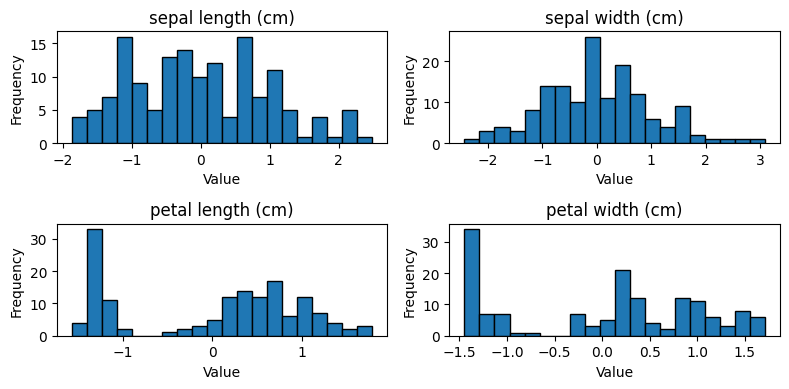

In [14]:
# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4))
axes = axes.flatten()  # Flatten the array for easy iteration

# Plot each feature
for i, feature in enumerate(df.columns[:num_rows * num_cols]):  # Limit to 4 features for 2x2
    axes[i].hist(df[feature].dropna(), bins=20, edgecolor='k')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
# statistical description after scaling
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


In [16]:
# Compute covariance matrix
corr_matrix = df.corr()
print("C Matrix:", corr_matrix)

C Matrix:                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


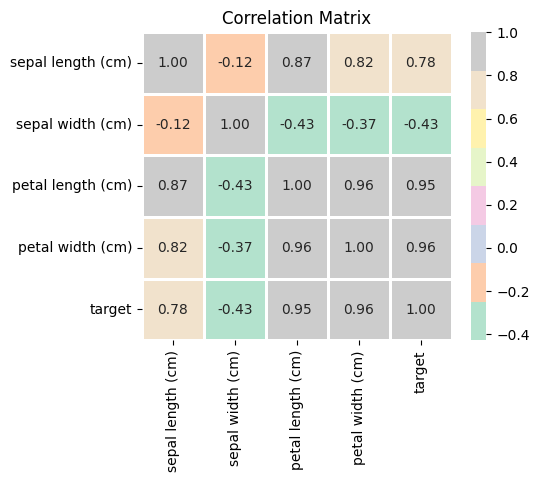

In [17]:
# Create the heatmap
import seaborn as sns
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2', fmt='.2f', linewidths=1)
# Add titles and labels
plt.title('Correlation Matrix')
plt.show()

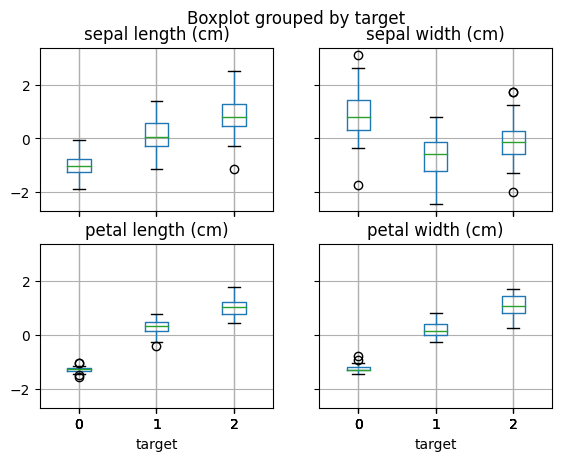

In [18]:
df.boxplot(by ='target', column =['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], grid = True);

In [19]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


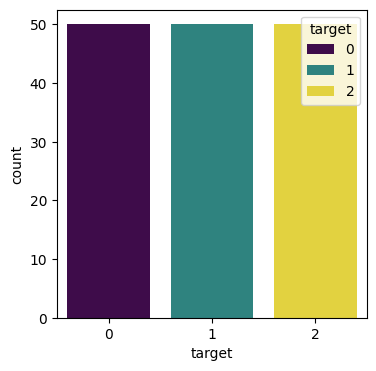

In [20]:
# Set the figure size
plt.figure(figsize=(4, 4))
# Create the count plot
sns.countplot(data=df, x="target", hue="target", palette='viridis');

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [22]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score

def minkowski_distance(x, y, p=2):
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

def chebyshev_distance(x, y):
    return np.max(np.abs(x - y))

class KNN:
    def __init__(self, k=3, distance_metric='euclidean', p=2):
        self.k = k
        self.distance_metric = distance_metric
        self.p = p  # Add p parameter for Minkowski distance

    def fit_knn(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _compute_distance(self, x):
        if self.distance_metric == 'minkowski':
            distances = [minkowski_distance(x, x_train, p=self.p) for x_train in self.X_train]
        elif self.distance_metric == 'cosine':
            distances = [cosine_similarity(x, x_train) for x_train in self.X_train]
        elif self.distance_metric == 'chebyshev':
            distances = [chebyshev_distance(x, x_train) for x_train in self.X_train]
        else:
            raise ValueError("Unsupported distance metric")
        return distances

    def predict_knn(self, X_test):
        predictions = []
        for x in X_test:
            distances = self._compute_distance(x)
            if self.distance_metric == 'cosine':
                k_indices = np.argsort(distances)[-self.k:]  # highest similarities
                k_nearest_labels = [self.y_train[i] for i in k_indices]
                prediction = Counter(k_nearest_labels).most_common(1)[0][0]
            else:
                k_indices = np.argsort(distances)[:self.k]  # lowest distances
                k_nearest_labels = [self.y_train[i] for i in k_indices]
                prediction = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(prediction)
        return predictions

In [23]:
# Counter(['a', 'a','b', 'b', 'a']).most_common(1)[0][0]
# output - 'a'

In [24]:
# Initialize KNN with k=3 and using Minkowski distance with p=2 (Euclidean distance)
knn = KNN(k=3, distance_metric='minkowski', p=2)
knn.fit_knn(X_train, y_train)

# Predict on validation set and compute accuracy
y_val_pred = knn.predict_knn(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Predict on test set and compute accuracy
y_test_pred = knn.predict_knn(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Validation Accuracy: 0.9706
Test Accuracy: 1.00


In [25]:
# KNN using scikit-learn package's built-in definition - KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [26]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(X_train, y_train)

In [27]:
val_preds = nbrs.predict(X_val)
test_preds = nbrs.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [29]:
# Accuracy
accuracy = accuracy_score(y_test, test_preds)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_preds, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_preds, average='weighted')
print(f'Recall: {recall:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_preds)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]



1. The ROC curve shows how well a model distinguishes between two classes by plotting the true positive rate against the false positive rate for different thresholds.

2. The precision-recall curve focuses on the balance between precision (how accurate positive predictions are) and recall (how many actual positives are found) and is especially useful when one class is much less common than the other.


FPR:  {0: array([0., 0., 1.]), 1: array([0.        , 0.        , 0.        , 0.11111111, 1.        ]), 2: array([0.        , 0.        , 0.        , 0.03846154, 1.        ])}


TPR:  {0: array([0., 1., 1.]), 1: array([0.        , 0.90909091, 1.        , 1.        , 1.        ]), 2: array([0.  , 0.75, 1.  , 1.  , 1.  ])}


ROC_AUC:  {0: 1.0, 1: 1.0, 2: 1.0}




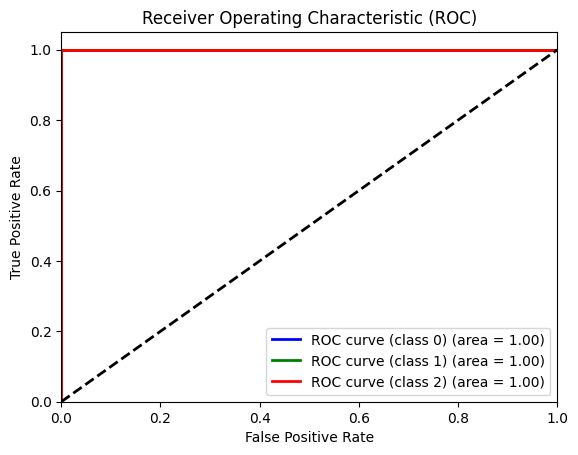

In [30]:
from sklearn.preprocessing import label_binarize
y_pred_prob = nbrs.predict_proba(X_test)

# Binarize the output for ROC and Precision-Recall curves
y_test_binarized = label_binarize(y_test, classes=np.unique(Y))
n_classes = y_test_binarized.shape[1]

# ROC curve and ROC AUC score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

print("FPR: ", fpr)
print("\n")

print("TPR: ", tpr)
print("\n")

print("ROC_AUC: ", roc_auc)
print("\n")

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

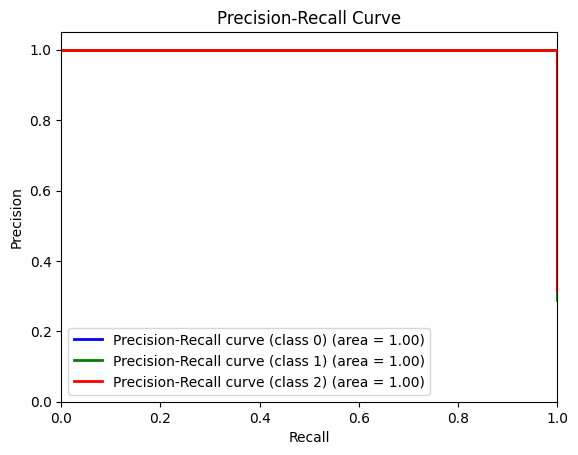

In [31]:
# Precision-Recall curve and average precision score
precision_vals = dict()
recall_vals = dict()
average_precision = dict()
for i in range(n_classes):
    precision_vals[i], recall_vals[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot Precision-Recall curves for each class
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(recall_vals[i], precision_vals[i], color=color, lw=2, label=f'Precision-Recall curve (class {i}) (area = {average_precision[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

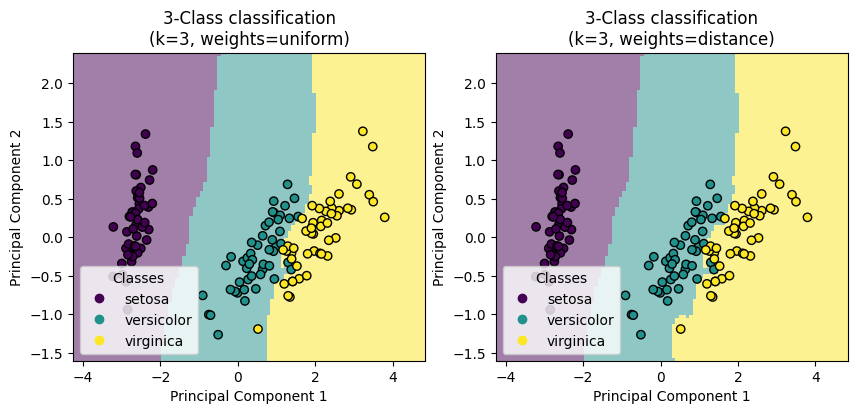

In [32]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

# Load and prepare the data
iris = load_iris()
X, y = iris.data, iris.target

# Perform PCA to reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.3, random_state=42)

# Plotting decision boundaries for different weight types
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

for ax, weights in zip(axs, ("uniform", "distance")):
    # Initialize and fit the KNN classifier
    knn = KNeighborsClassifier(weights=weights, n_neighbors=3)
    knn.fit(X_train_pca, y_train)

    # Plot the decision boundary
    disp = DecisionBoundaryDisplay.from_estimator(
        knn,
        X_test_pca,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='Principal Component 1',
        ylabel='Principal Component 2',
        shading="auto",
        alpha=0.5,
        ax=ax,
    )

    # Scatter plot of the data points
    scatter = disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    ax.set_title(f"3-Class classification\n(k={knn.n_neighbors}, weights={weights})")

plt.show()

## **Lab Assignment 1**

<font color='purple'>**K-NN regression**</font>

<font color='blue'>Description:</font> Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

<font color='blue'>scikit-learn implements two different neighbors regressors: </font>  
1. ***KNeighborsRegressor*** implements learning based on the K nearest neighbors of each query point, where K is an integer value specified by the user.
2. ***RadiusNeighborsRegressor*** implements learning based on the neighbors within a fixed radius of the query point, where is a floating-point value specified by the user.

<font color='red'>**NOTE**</font>

The basic nearest neighbors regression uses ```uniform weights:``` that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to ```weight points``` such that nearby points contribute more to the regression than faraway points. This can be accomplished through the ```weights keyword```. The default value, ```weights = 'uniform'```, assigns equal weights to all points. ```weights = 'distance'``` assigns weights proportional to the inverse of the distance from the query point.

**Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights.**


### <font color='blue'>Objective: </font>

In this assignment, you will implement and evaluate a K-Nearest Neighbors (KNN) regression model using a toy dataset generated with scikit-learn. You will implement with scikit-learn's built-in KNN regression and analyze the performance.

#### Task - 1:
Dataset creation using make_regression of scikit-learn [Mark - 0]



In [33]:
# Creating regression dataset
# from sklearn.datasets import make_regression
# import pandas as pd

# # Creating a toy regression dataset with 5 features
# X_gen, y_gen = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# # Combine the features and target into one DataFrame
# df = pd.DataFrame(X_gen, columns=[f'Feature_{i}' for i in range(1, 6)])
# df['target'] = y_gen

# # Save the DataFrame to a CSV file
# df.to_csv('regression_dataset.csv', index=False)

#### Task - 2:
Two K-NN regressor implementations (from scratch)
1. Average of K-nearest neighbors [Marks - 5]
2. Weighted average of k nearest neighbors, with weights being inverse of distances from the k neighbors [Marks - 5]

In [34]:
# Solution code

#### Task - 3:
Plot regression metric (mean squared error) against different values of k ``` {3, 7, 11}``` and different distance measures ```{p=2, p=1, p=5}```and report the k value and distance measure combination that gave the best performance (lowest MSE) [Marks - 4]

In [35]:
# Solution code

#### Task - 4:
Implement KNN regression using scikit-learn, with the same values of k and p as above

##### Note - one argument of scikit-learn KNN is ```algorithm='auto'``` and acceptable values are ```{'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto' ```. For this task use ```'brute'``` setting.

[Marks - 4]

In [36]:
# Solution code

#### Task - 5:
Comparison with scikit-learn's implementation - Does the optimal values of k and distance metric as well as best performance level of the from scratch implementation match with those given by Sklearn?

 [Marks - 2]

In [37]:
# Solution code